# Task for Today  

***

## Spotify Hit Prediction  

Given *data about Spotify songs from the 1960s-2010s*, let's try to predict whether a given song will be a **hit** or not.

We will use a variety of classification models to make our predictions.

# Getting Started

In [146]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import matplotlib.pylab as plt
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

Method 1: K-nearest neighbors

In [147]:
df_spotify_00 = pd.concat(pd.read_csv(f'dataset-of-{decade}0s.csv') for decade in ['0'])#['6', '7', '8', '9', '0', '1'])
df_spotify_00['number'] = df_spotify_00.index + 1

In [148]:
df_spotify_10 = pd.concat(pd.read_csv(f'dataset-of-{decade}0s.csv') for decade in ['1'])#['6', '7', '8', '9', '0', '1'])
df_spotify_10['number'] = df_spotify_10.index + 1

In [149]:
df_spotify_00

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,number
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.4710,4,-7.270,1,0.0289,0.368000,0.000000,0.1590,0.532,133.061,196707,4,30.88059,13,1,1
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.8540,10,-5.477,0,0.1830,0.018500,0.000000,0.1480,0.688,92.988,242587,4,41.51106,10,1,2
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.8360,9,-3.009,1,0.0473,0.000111,0.004570,0.1740,0.300,86.964,338893,4,65.32887,13,0,3
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.9940,4,-3.745,1,0.1660,0.000007,0.078400,0.1920,0.333,148.440,255667,4,58.59528,9,0,4
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.7640,2,-4.353,1,0.0275,0.363000,0.000000,0.1250,0.631,112.098,193760,4,22.62384,10,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5867,Summer Rain,Carl Thomas,spotify:track:0NBHHa8wwwmBnn3aAzX5wJ,0.667,0.6270,6,-10.488,0,0.0654,0.097200,0.000052,0.1110,0.784,186.081,232560,4,40.87045,10,1,5868
5868,And I,Ciara,spotify:track:1Jp9n1uHB72CfK31j4mEPh,0.691,0.3890,6,-10.125,1,0.0653,0.255000,0.000000,0.0981,0.437,122.219,233840,4,81.77735,7,1,5869
5869,"Mass in B minor BWV 232, Missa: Duetto - Chris...",Johann Sebastian Bach,spotify:track:4NIOi1ImMfdufRTsgoKjbD,0.297,0.0773,2,-23.839,1,0.0620,0.951000,0.000217,0.1210,0.401,75.916,275560,4,37.51903,11,0,5870
5870,Loog,The Clean,spotify:track:2Qyj2nUdm8y37TCCzDasFn,0.390,0.6010,7,-8.236,0,0.0291,0.031300,0.947000,0.1190,0.439,116.122,223627,4,39.84092,11,0,5871


In [150]:
df_spotify_10

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,number
0,Wild Things,Alessia Cara,spotify:track:2ZyuwVvV6Z3XJaXIFbspeE,0.741,0.626,1,-4.826,0,0.0886,0.02000,0.000000,0.0828,0.7060,108.029,188493,4,41.18681,10,1,1
1,Surfboard,Esquivel!,spotify:track:61APOtq25SCMuK0V5w2Kgp,0.447,0.247,5,-14.661,0,0.0346,0.87100,0.814000,0.0946,0.2500,155.489,176880,3,33.18083,9,0,2
2,Love Someone,Lukas Graham,spotify:track:2JqnpexlO9dmvjUMCaLCLJ,0.550,0.415,9,-6.557,0,0.0520,0.16100,0.000000,0.1080,0.2740,172.065,205463,4,44.89147,9,1,3
3,Music To My Ears (feat. Tory Lanez),Keys N Krates,spotify:track:0cjfLhk8WJ3etPTCseKXtk,0.502,0.648,0,-5.698,0,0.0527,0.00513,0.000000,0.2040,0.2910,91.837,193043,4,29.52521,7,0,4
4,Juju On That Beat (TZ Anthem),Zay Hilfigerrr & Zayion McCall,spotify:track:1lItf5ZXJc1by9SbPeljFd,0.807,0.887,1,-3.892,1,0.2750,0.00381,0.000000,0.3910,0.7800,160.517,144244,4,24.99199,8,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6393,Lotus Flowers,Yolta,spotify:track:4t1TljQWJ6ZuoSY67zVvBI,0.172,0.358,9,-14.430,1,0.0342,0.88600,0.966000,0.3140,0.0361,72.272,150857,4,24.30824,7,0,6394
6394,Calling My Spirit,Kodak Black,spotify:track:2MShy1GSSgbmGUxADNIao5,0.910,0.366,1,-9.954,1,0.0941,0.09960,0.000000,0.2610,0.7400,119.985,152000,4,32.53856,8,1,6395
6395,Teenage Dream,Katy Perry,spotify:track:55qBw1900pZKfXJ6Q9A2Lc,0.719,0.804,10,-4.581,1,0.0355,0.01320,0.000003,0.1390,0.6050,119.999,227760,4,20.73371,7,1,6396
6396,Stormy Weather,Oscar Peterson,spotify:track:4o9npmYHrOF1rUxxTVH8h4,0.600,0.177,7,-16.070,1,0.0561,0.98900,0.868000,0.1490,0.5600,120.030,213387,4,21.65301,14,0,6397


In [151]:
df_spotify_00.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target', 'number'],
      dtype='object')

In [152]:
df_spotify_00.dtypes

track                object
artist               object
uri                  object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
chorus_hit          float64
sections              int64
target                int64
number                int64
dtype: object

In [153]:
# Drop high-cardinality categorical columns
df_spotify_00 = df_spotify_00.drop(['track', 'artist', 'uri'], axis=1)
df_spotify_10 = df_spotify_10.drop(['track', 'artist', 'uri'], axis=1)

# Preprocessing

In [154]:
# Develop training and validation partitions, 60% (0.6)for 
# training parition data and 40% (0.4) for validation data. 
trainData, validData = train_test_split(df_spotify_00, test_size=0.4, random_state=26)

#Display training partition shape (number of records, number of columns)
print('Number of Records and Columns in Training and Validation Partitions')
print(trainData.shape, validData.shape)

# Display training and validation partition records. 
print()
print('Training Partition Records')
print(trainData)
print()
print('Validation Partition Records')
print(validData)

Number of Records and Columns in Training and Validation Partitions
(3523, 17) (2349, 17)

Training Partition Records
      danceability  energy  key  loudness  mode  speechiness  acousticness  \
638          0.777   0.810    7    -4.968     1       0.0462      0.019200   
1346         0.859   0.622   11    -8.196     1       0.0445      0.066100   
5385         0.606   0.750    8    -4.535     0       0.0306      0.002640   
3097         0.466   0.721    2    -5.450     1       0.0358      0.285000   
1229         0.609   0.923    9    -3.908     1       0.0338      0.160000   
...            ...     ...  ...       ...   ...          ...           ...   
1126         0.460   0.898    1    -5.125     1       0.0477      0.000147   
1985         0.584   0.873   11    -4.417     0       0.2840      0.477000   
1456         0.582   0.753   10    -5.199     0       0.1150      0.000130   
5438         0.493   0.735    1    -6.012     1       0.0432      0.077100   
4917         0.633   0.4

In [155]:
# Develop standardized (normalized) data for the entire data set. 
scaler = StandardScaler()

# Note the use of an array of column names.
scaler.fit(df_spotify_00)  

print('Standardized (Normalized) Values of Riding Mowers Data Set')
print()
print(df_spotify_00)

Standardized (Normalized) Values of Riding Mowers Data Set

      danceability  energy  key  loudness  mode  speechiness  acousticness  \
0            0.578  0.4710    4    -7.270     1       0.0289      0.368000   
1            0.704  0.8540   10    -5.477     0       0.1830      0.018500   
2            0.162  0.8360    9    -3.009     1       0.0473      0.000111   
3            0.188  0.9940    4    -3.745     1       0.1660      0.000007   
4            0.630  0.7640    2    -4.353     1       0.0275      0.363000   
...            ...     ...  ...       ...   ...          ...           ...   
5867         0.667  0.6270    6   -10.488     0       0.0654      0.097200   
5868         0.691  0.3890    6   -10.125     1       0.0653      0.255000   
5869         0.297  0.0773    2   -23.839     1       0.0620      0.951000   
5870         0.390  0.6010    7    -8.236     0       0.0291      0.031300   
5871         0.539  0.7400    0    -5.566     0       0.0490      0.194000   

   

In [156]:
# Develop standardized (normalized) data in training and validation
# partitions. 
trainNorm = df_spotify_00.iloc[trainData.index]
validNorm = df_spotify_00.iloc[validData.index]

# Display normalized records in training partition.
print('Standardized (Normalized) Values of Training Data Parition')
print()
print(trainNorm)


Standardized (Normalized) Values of Training Data Parition

      danceability  energy  key  loudness  mode  speechiness  acousticness  \
638          0.777   0.810    7    -4.968     1       0.0462      0.019200   
1346         0.859   0.622   11    -8.196     1       0.0445      0.066100   
5385         0.606   0.750    8    -4.535     0       0.0306      0.002640   
3097         0.466   0.721    2    -5.450     1       0.0358      0.285000   
1229         0.609   0.923    9    -3.908     1       0.0338      0.160000   
...            ...     ...  ...       ...   ...          ...           ...   
1126         0.460   0.898    1    -5.125     1       0.0477      0.000147   
1985         0.584   0.873   11    -4.417     0       0.2840      0.477000   
1456         0.582   0.753   10    -5.199     0       0.1150      0.000130   
5438         0.493   0.735    1    -6.012     1       0.0432      0.077100   
4917         0.633   0.436    9    -7.979     0       0.0377      0.171000   

   

In [157]:
# Develop and print standardized (normalized) data for new record.
newspotify_norm = pd.DataFrame(scaler.transform(df_spotify_10))
print()
print('Normalized Values for New Records')
print(newspotify_norm)


Normalized Values for New Records
            0         1         2         3         4         5         6   \
0     1.042544 -0.288137 -1.199937  0.514152 -1.348206 -0.039579 -0.655592   
1    -0.504935 -1.882104 -0.077556 -1.413483 -1.348206 -0.608065  2.214700   
2     0.037209 -1.175544  1.044826  0.174880 -1.348206 -0.424886 -0.180021   
3    -0.215440 -0.195612 -1.480533  0.343242 -1.348206 -0.417517 -0.705747   
4     1.389937  0.809555 -1.199937  0.697213  0.741727  1.922751 -0.710199   
...        ...       ...       ...       ...       ...       ...       ...   
6393 -1.952406 -1.415270  1.044826 -1.368207  0.741727 -0.612276  2.265293   
6394  1.932080 -1.381624 -1.199937 -0.490923  0.741727  0.018323 -0.387114   
6395  0.926746  0.460480  1.325422  0.562171  0.741727 -0.598590 -0.678528   
6396  0.300386 -2.176505  0.483635 -1.689643  0.741727 -0.381723  2.612696   
6397 -2.220846 -2.403613 -0.358151 -3.052805 -1.348206 -0.505948  2.528375   

            7         8     

In [158]:
# Identify trainining and validation predictors, zIncome
# and zLot_Size.
train_X = trainNorm
valid_X = validNorm

# Identify training and validation response variable, target.
train_y = trainNorm['target']
valid_y = validNorm['target']

# Apply NearestNeighbors() function for k=3 in training 
# parition. 
knn = KNeighborsClassifier(n_neighbors=3).fit(train_X, train_y)

# Indetify and display distances and indices of the 
# 3 nearest neighbors to the new record.  
distances, indices = knn.kneighbors(newspotify_norm)
print('Distances to New Records:',distances)

# Identify and display results of the nearest neighbors. 
# indices is a list of lists, we are only interested in the first 
# element, which is the nearest neighbors for the new record.
print()
print('The Nearest Neighbors for New Records')
print(trainNorm.iloc[indices[0], :])  

Distances to New Records: [[16729.05879242 23415.8151007  24612.51695307]
 [16729.12417208 23415.89048725 24612.59034657]
 [16728.92314266 23415.68550624 24612.38671175]
 ...
 [16727.62913541 23414.95158361 24611.47924268]
 [16727.72698831 23415.05241433 24611.57917972]
 [16726.86152852 23414.14934435 24610.6843532 ]]

The Nearest Neighbors for New Records
      danceability  energy  key  loudness  mode  speechiness  acousticness  \
5133         0.211   0.653    2    -3.985     1       0.0772      0.000174   
3621         0.511   0.415    2   -11.279     1       0.8220      0.894000   
4956         0.353   0.670    2   -12.232     1       0.3140      0.692000   

      instrumentalness  liveness  valence    tempo  duration_ms  \
5133          0.000000     0.581    0.000  152.211        15920   
3621          0.000000     0.965    0.520   99.449        23133   
4956          0.000036     0.974    0.091  122.955        24107   

      time_signature  chorus_hit  sections  target  number 

In [159]:
# Identify best k value for number of nearest neighbors using 
# validation partition.

# Develop k-NN classifier using training partition for various
# values of k and then identify accuracy score using validation
# partition. Accuracy score (accuracy) means a probability of 
# correct predictions with the k-NN classifier. 
results = []
for k in range(1, 15):
    # Train knn classifier using training partition.
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        # For each k, identify accuracy score using validation 
        # partition.
        'Accuracy Score': accuracy_score(valid_y, knn.predict(valid_X))
    })

# Convert results to a pandas data frame. The smallest k value 
# with the highest accuracy is the best k to apply in k-NN 
# classifier. 
results = pd.DataFrame(results)
print(results)

     k  Accuracy Score
0    1        0.596424
1    2        0.563644
2    3        0.620690
3    4        0.597701
4    5        0.634738
5    6        0.610047
6    7        0.644530
7    8        0.619838
8    9        0.644104
9   10        0.630481
10  11        0.653044
11  12        0.634312
12  13        0.652192
13  14        0.645807


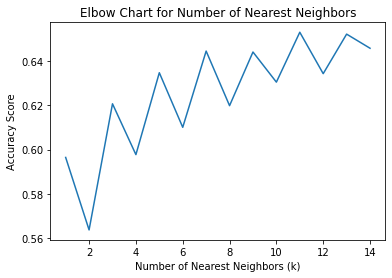

In [160]:
# Develop and display Elbow chart to compare accuracy_score with 
# number of nearest neighbors, k, from 1 to 20. 
ax = results.plot(x='k', y='Accuracy Score')
plt.xlabel('Number of Nearest Neighbors (k)')
plt.ylabel('Accuracy Score')

plt.title('Elbow Chart for Number of Nearest Neighbors')
ax.legend().set_visible(False)
plt.show()

In [169]:
# Retrain with full dataset.
spotify_X = df_spotify_00[['danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections']]
spotify_y = df_spotify_00['target']

# Develop k-NN classifier for the entire data set, k = 11.
kNN = KNeighborsClassifier(n_neighbors=11).fit(spotify_X, spotify_y)

# Display new record's classification result, distances and 
# indices, and nearest neighbors. 
df_spotify_10_red = df_spotify_10.drop(['target','number'], axis=1)
new_record_class = kNN.predict(df_spotify_10_red)
print('New Records Classification:', new_record_class)

# Identify and display distances to new record and indices 
# of nearest neighbors. 
distances, indices = kNN.kneighbors(df_spotify_10_red)
print()
print('Distances to New Records:',distances)
# print('Indices of Nearest Neighbors:', indices)

# Indetify and display nearest neighbors.
print()
print('Nearest Neighbors to New Record')
print(df_spotify_00.iloc[indices[0], :])

New Record Classification: [1 0 1 ... 1 1 0]

Distances to New Record: [[ 13.50069121  45.64175003  51.95207776 ... 201.93488053 215.13499063
  231.32910013]
 [ 13.89582333  56.249629    90.52510791 ... 230.92743743 297.12720925
  360.49255152]
 [ 41.4015119   64.62272918 127.66041697 ... 169.01171405 175.09953841
  197.0639501 ]
 ...
 [ 28.19032386  32.53753691  47.31100989 ... 110.35116497 119.90541442
  124.08334291]
 [ 28.90131911  32.04268578  38.72342482 ...  85.47228158  87.18607759
   94.84584152]
 [ 79.62054027  98.0557081  104.32720512 ... 486.80736953 557.56304884
  593.08752876]]

Nearest Neighbors to New Record
      danceability  energy  key  loudness  mode  speechiness  acousticness  \
998          0.840   0.571   10    -7.421     1       0.0797      0.160000   
3889         0.587   0.700    1    -8.638     0       0.0375      0.010800   
3173         0.628   0.941    0    -3.305     1       0.0508      0.051900   
5458         0.597   0.787    6    -5.322     1       0.

Method 2: Neural Networks